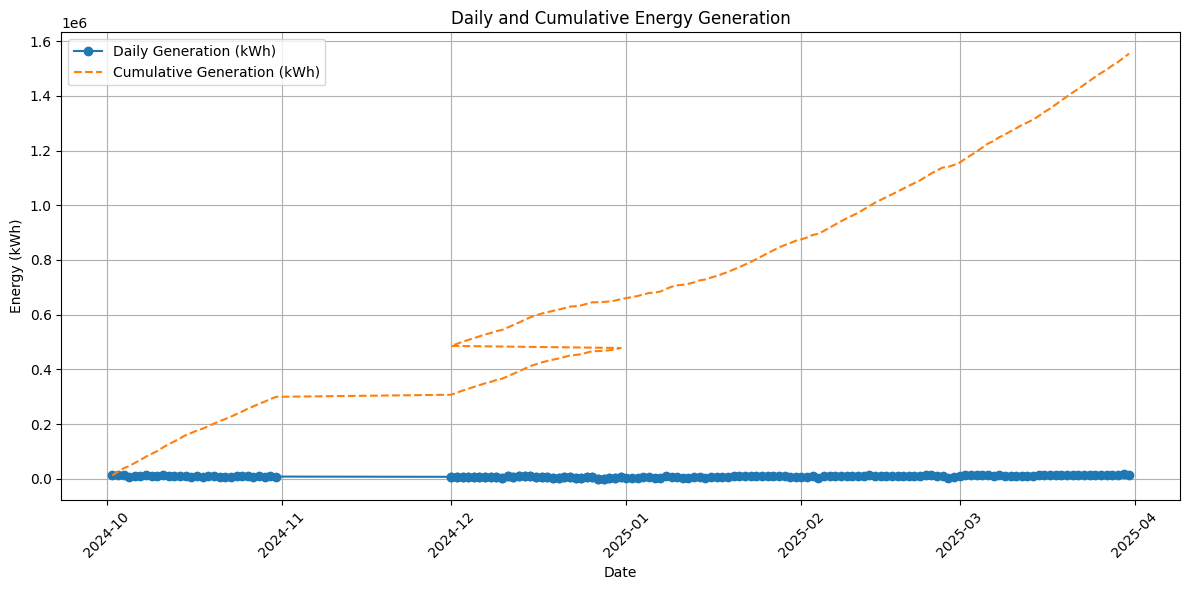

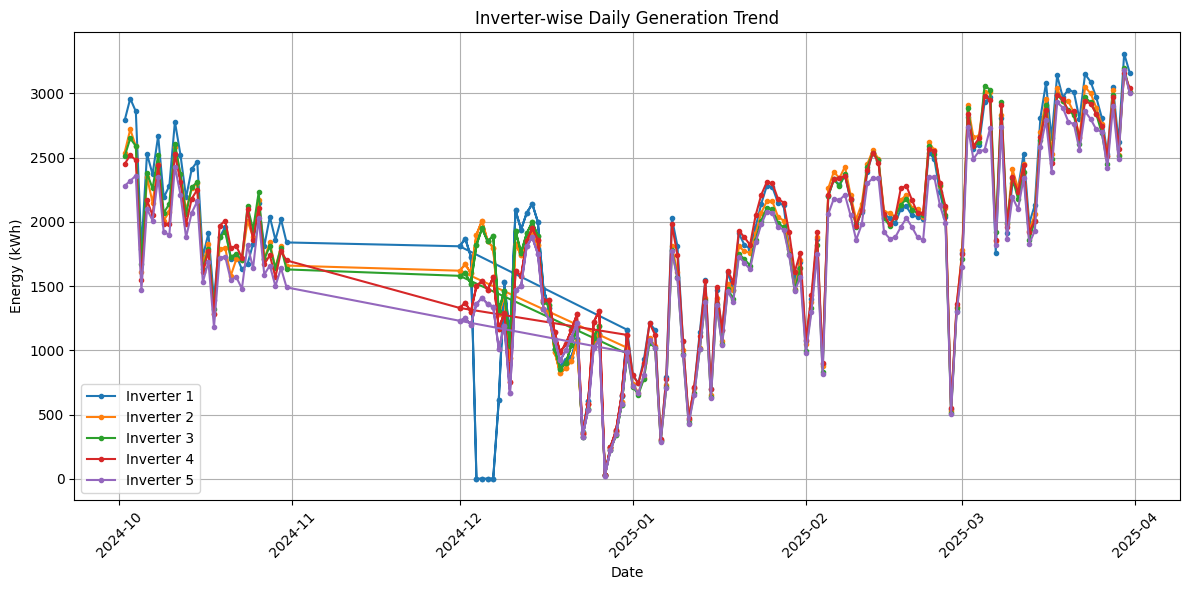

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)  # Skip first 6 rows of header

# Clean column names
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5', 'Total Generation',
              'Irradiation', 'Solar Meter', 'Billing Difference']

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate cumulative generation
df['Cumulative Generation'] = df['Total Generation'].cumsum()

# Plot 1: Total Generation vs Cumulative Generation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total Generation'], label='Daily Generation (kWh)', marker='o')
plt.plot(df['Date'], df['Cumulative Generation'], label='Cumulative Generation (kWh)', linestyle='--')
plt.title('Daily and Cumulative Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Inverter-wise Daily Generation
plt.figure(figsize=(12, 6))
for inverter in ['Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5']:
    plt.plot(df['Date'], df[inverter], label=inverter, marker='.')
plt.title('Inverter-wise Daily Generation Trend')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


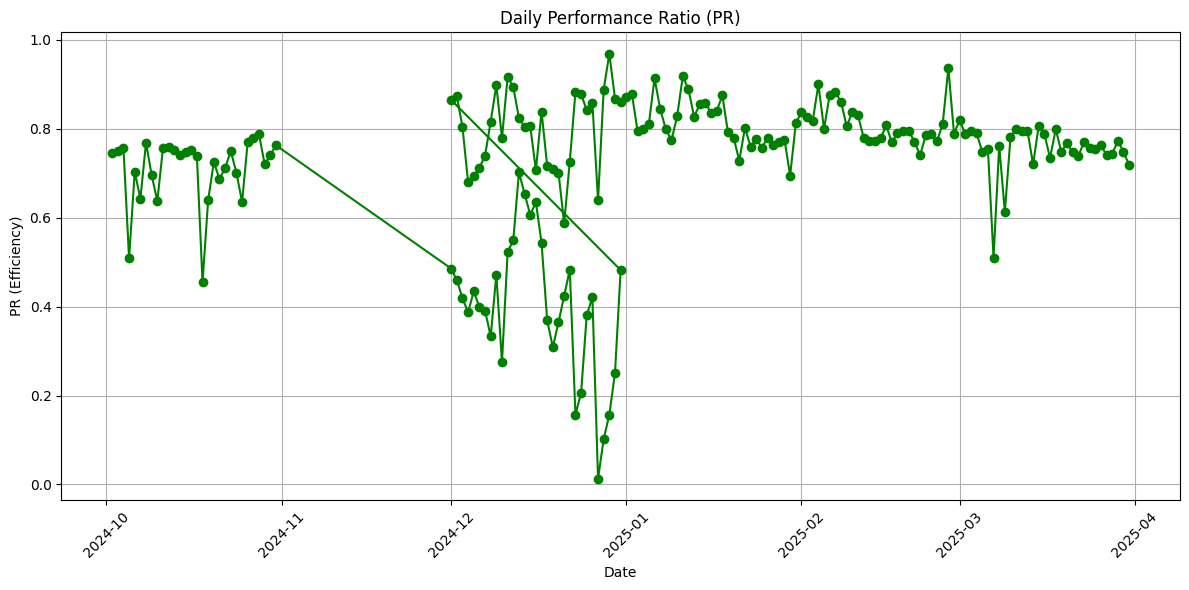

          Date  Total Generation  Irradiation        PR
0   2024-10-02             12570        7.497  0.745170
1   2024-10-03             13170        7.797  0.750699
2   2024-10-04             12880        7.558  0.757385
3   2024-10-05              8090        7.072  0.508410
4   2024-10-06             11530        7.285  0.703408
..         ...               ...          ...       ...
177 2025-03-27             12420        7.448  0.741122
178 2025-03-28             14940        8.931  0.743461
179 2025-03-29             12710        7.309  0.772850
180 2025-03-30             16030        9.524  0.748035
181 2025-03-31             15220        9.417  0.718307

[182 rows x 4 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns for clarity
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Installed DC capacity (from row 6 in your file)
installed_dc_capacity = 2250.05  # kW

# Calculate Performance Ratio (PR)
df['PR'] = df['Total Generation'] / (df['Irradiation'] * installed_dc_capacity)

# Plot the PR trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PR'], marker='o', linestyle='-', color='green')
plt.title('Daily Performance Ratio (PR)')
plt.xlabel('Date')
plt.ylabel('PR (Efficiency)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print the dataframe with PR
print(df[['Date', 'Total Generation', 'Irradiation', 'PR']])


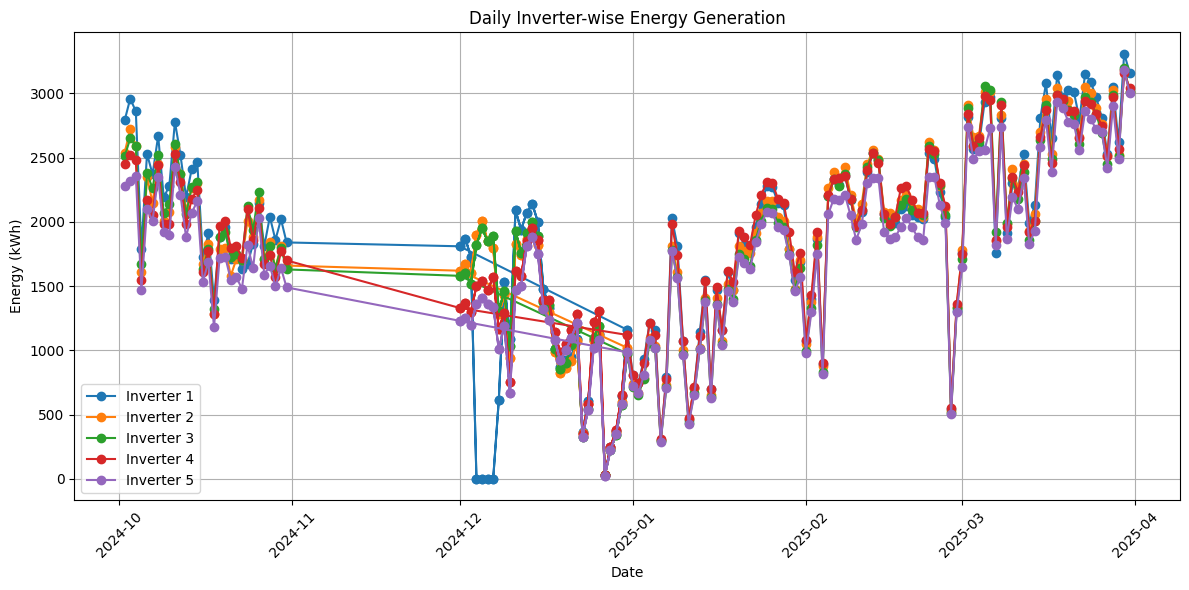

🔹 Total Generation per Inverter:
 Inverter 1    312050
Inverter 2    317314
Inverter 3    316120
Inverter 4    315378
Inverter 5    293340
dtype: int64

🔹 Average Daily Generation per Inverter:
 Inverter 1    1714.560440
Inverter 2    1743.483516
Inverter 3    1736.923077
Inverter 4    1732.846154
Inverter 5    1611.758242
dtype: float64

🚩 Underperforming Inverters (below 95% of average):
Inverter 5    1611.758242
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# ---------- 1. Plot Daily Inverter Generation ----------
plt.figure(figsize=(12, 6))
for inverter in ['Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5']:
    plt.plot(df['Date'], df[inverter], marker='o', label=inverter)

plt.title('Daily Inverter-wise Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- 2. Compute Total and Average Generation for Each Inverter ----------
inverter_columns = ['Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5']
total_generation = df[inverter_columns].sum()
average_generation = df[inverter_columns].mean()

print("🔹 Total Generation per Inverter:\n", total_generation)
print("\n🔹 Average Daily Generation per Inverter:\n", average_generation)

# ---------- 3. Detect Underperforming Inverters ----------
threshold = average_generation.mean() * 0.95  # 5% below average of averages
underperformers = average_generation[average_generation < threshold]

print("\n🚩 Underperforming Inverters (below 95% of average):")
print(underperformers)


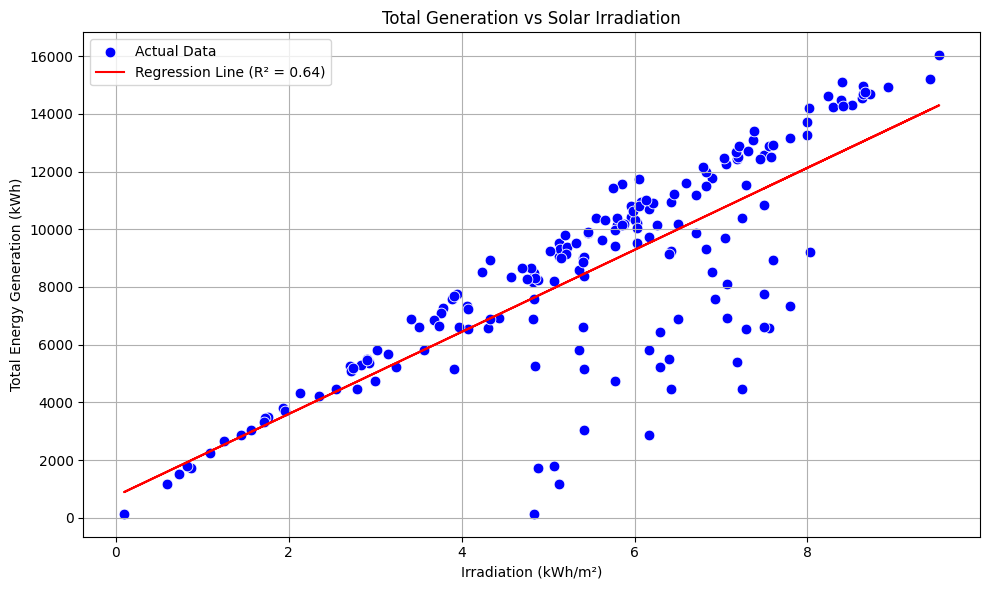

Regression Equation: Generation = 1422.19 * Irradiation + 752.09
R² Score: 0.6415


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Load Excel file
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']

# Drop any rows with missing values in key columns
df = df.dropna(subset=['Total Generation', 'Irradiation'])

# ---------- Linear Regression ----------
X = df[['Irradiation']].values  # Independent variable
y = df['Total Generation'].values  # Dependent variable

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(y, y_pred)

# ---------- Plot ----------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Irradiation'], y=df['Total Generation'], color='blue', s=60, label='Actual Data')
plt.plot(df['Irradiation'], y_pred, color='red', label=f'Regression Line (R² = {r2:.2f})')
plt.title('Total Generation vs Solar Irradiation')
plt.xlabel('Irradiation (kWh/m²)')
plt.ylabel('Total Energy Generation (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print regression slope and intercept
print(f"Regression Equation: Generation = {model.coef_[0]:.2f} * Irradiation + {model.intercept_:.2f}")
print(f"R² Score: {r2:.4f}")


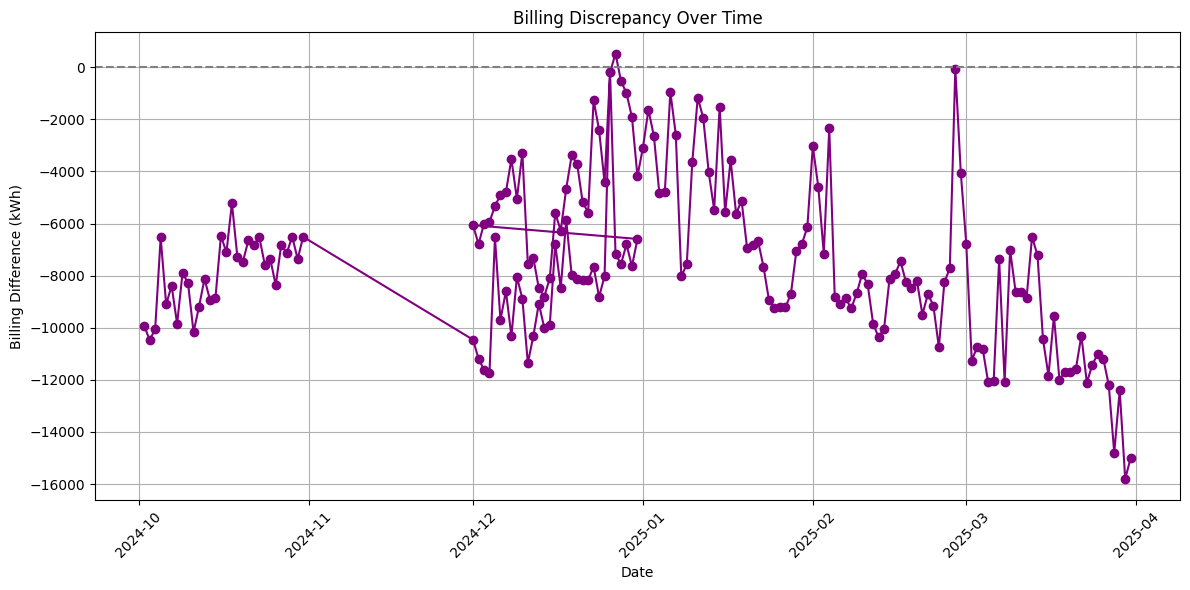

🚨 Days with Large Billing Discrepancies (> 5% of average generation):
          Date  Total Generation  Billing Difference
0   2024-10-02             12570               -9920
1   2024-10-03             13170              -10480
2   2024-10-04             12880              -10040
3   2024-10-05              8090               -6530
4   2024-10-06             11530               -9100
..         ...               ...                 ...
177 2025-03-27             12420              -12200
178 2025-03-28             14940              -14800
179 2025-03-29             12710              -12400
180 2025-03-30             16030              -15800
181 2025-03-31             15220              -15000

[179 rows x 3 columns]

📊 Correlation between Generation and Billing Difference: -0.8006


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# ---------- Plot Billing Discrepancy ----------
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Billing Difference'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Billing Discrepancy Over Time')
plt.xlabel('Date')
plt.ylabel('Billing Difference (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Highlight Days with Large Discrepancy ----------
threshold = 0.05 * df['Total Generation'].mean()  # 5% of average daily generation
large_discrepancies = df[abs(df['Billing Difference']) > threshold]

print("🚨 Days with Large Billing Discrepancies (> 5% of average generation):")
print(large_discrepancies[['Date', 'Total Generation', 'Billing Difference']])

# ---------- Optional: Correlation ----------
correlation = df['Total Generation'].corr(df['Billing Difference'])
print(f"\n📊 Correlation between Generation and Billing Difference: {correlation:.4f}")


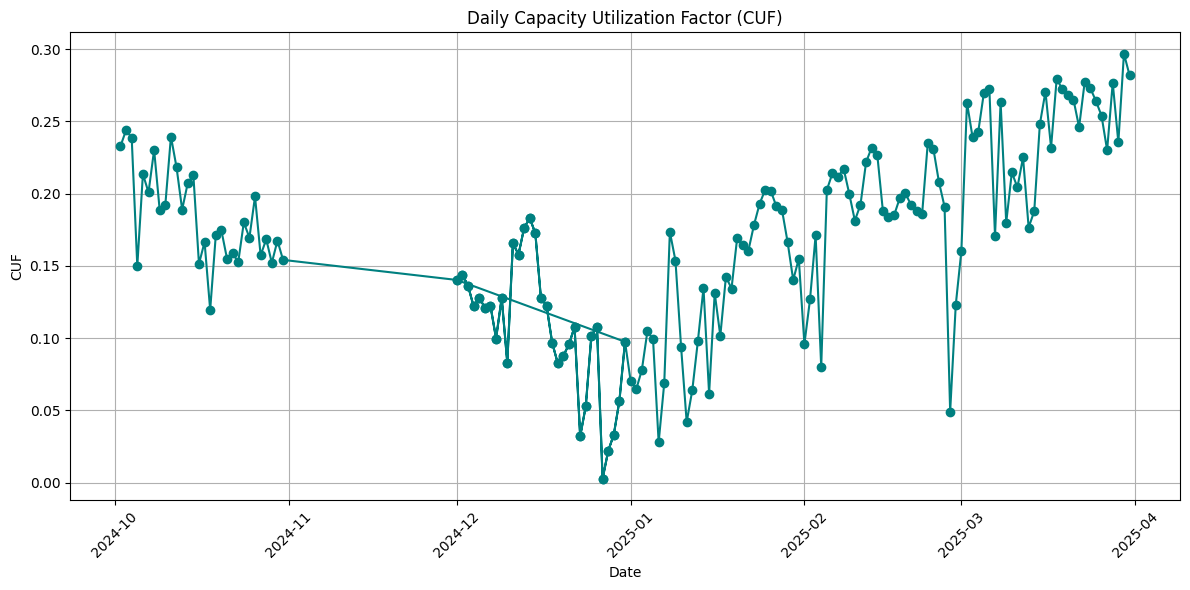

⚡ Average CUF over the period: 0.1581 (15.81%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Installed DC Capacity (kW)
installed_dc_capacity = 2250.05

# Calculate CUF
df['CUF'] = df['Total Generation'] / (installed_dc_capacity * 24)

# ---------- Plot CUF ----------
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['CUF'], marker='o', linestyle='-', color='teal')
plt.title('Daily Capacity Utilization Factor (CUF)')
plt.xlabel('Date')
plt.ylabel('CUF')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Optional: Summary ----------
average_cuf = df['CUF'].mean()
print(f"⚡ Average CUF over the period: {average_cuf:.4f} ({average_cuf * 100:.2f}%)")


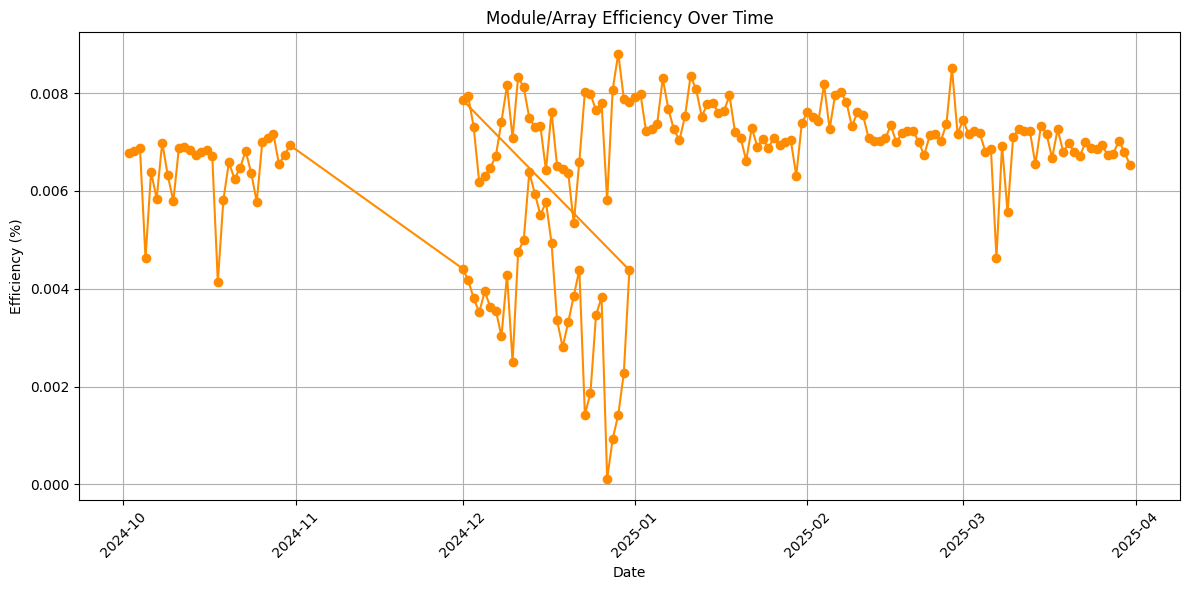

🔎 Average Module Efficiency: 0.01%
        Date  Total Generation  Irradiation  Efficiency (%)
0 2024-10-02             12570        7.497        0.006774
1 2024-10-03             13170        7.797        0.006825
2 2024-10-04             12880        7.558        0.006885
3 2024-10-05              8090        7.072        0.004622
4 2024-10-06             11530        7.285        0.006395


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Constants
total_module_rating_watt = 2250050  # 2.25 MW = 2,250.05 kW = 2,250,050 W
module_area_m2 = 11000  # 🛠️ Replace this with actual area if known

# Avoid division by zero
df = df[df['Irradiation'] > 0]

# Calculate Efficiency
df['Efficiency (%)'] = (df['Total Generation'] * 1000) / (total_module_rating_watt * df['Irradiation'] * module_area_m2) * 100

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Efficiency (%)'], marker='o', linestyle='-', color='darkorange')
plt.title('Module/Array Efficiency Over Time')
plt.xlabel('Date')
plt.ylabel('Efficiency (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
avg_eff = df['Efficiency (%)'].mean()
print(f"🔎 Average Module Efficiency: {avg_eff:.2f}%")

# Optional: Print a few rows
print(df[['Date', 'Total Generation', 'Irradiation', 'Efficiency (%)']].head())


🔍 Anomalies Detected (Low Generation despite Moderate/High Irradiation):

          Date  Total Generation  Irradiation  Z_Generation
56  2024-12-27               138        4.837     -2.357956
57  2024-12-28              1181        5.131     -2.065231
180 2025-03-30             16030        9.524      2.102237


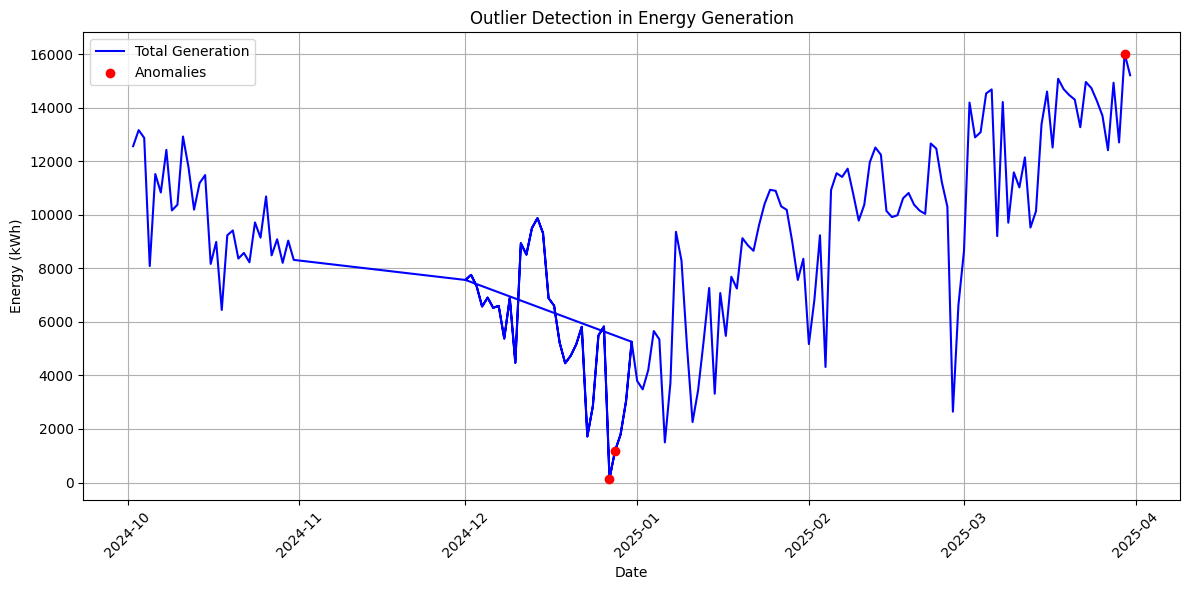

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load data
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)

# Rename columns
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']
df['Date'] = pd.to_datetime(df['Date'])

# Drop NA values from key columns
df = df.dropna(subset=['Total Generation', 'Irradiation'])

# ----------------------------
# Method 1: Z-Score Detection
# ----------------------------
df['Z_Generation'] = zscore(df['Total Generation'])

# Mark Z-score-based anomalies (threshold: ±2)
z_outliers = df[abs(df['Z_Generation']) > 2]

# ----------------------------
# Method 2: IQR-Based Detection
# ----------------------------
Q1 = df['Total Generation'].quantile(0.25)
Q3 = df['Total Generation'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR

iqr_outliers = df[df['Total Generation'] < lower_bound]

# ----------------------------
# Merge and Remove Duplicates
# ----------------------------
combined_outliers = pd.concat([z_outliers, iqr_outliers]).drop_duplicates()

# ----------------------------
# Filter for Suspicious Drops:
# Low generation with normal or high irradiation
# ----------------------------
anomalies = combined_outliers[combined_outliers['Irradiation'] > df['Irradiation'].quantile(0.25)]

print("🔍 Anomalies Detected (Low Generation despite Moderate/High Irradiation):\n")
print(anomalies[['Date', 'Total Generation', 'Irradiation', 'Z_Generation']])

# ----------------------------
# Plot Anomalies
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total Generation'], label='Total Generation', color='blue')
plt.scatter(anomalies['Date'], anomalies['Total Generation'], color='red', label='Anomalies', zorder=5)
plt.title('Outlier Detection in Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


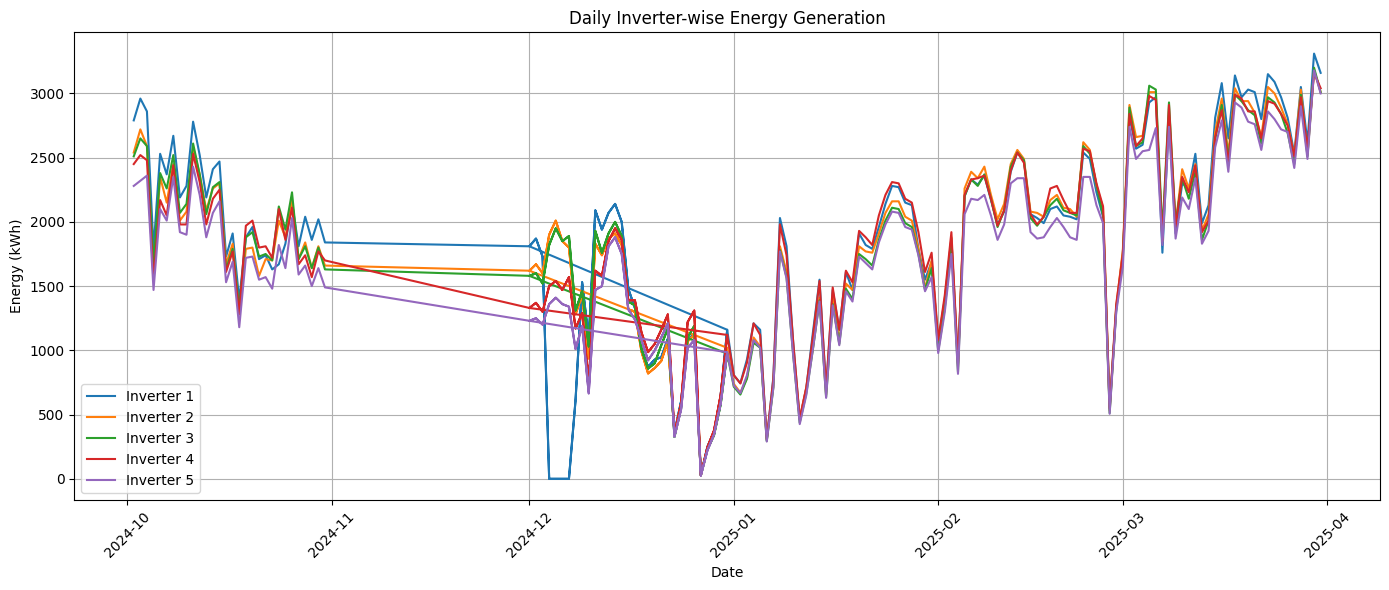

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
file_path = '2MW data.xlsx'
df = pd.read_excel(file_path, skiprows=6)
df.columns = ['Date', 'Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5',
              'Total Generation', 'Irradiation', 'Solar Meter', 'Billing Difference']
df['Date'] = pd.to_datetime(df['Date'])

# Plot inverter-wise generation
plt.figure(figsize=(14, 6))
for inverter in ['Inverter 1', 'Inverter 2', 'Inverter 3', 'Inverter 4', 'Inverter 5']:
    plt.plot(df['Date'], df[inverter], label=inverter)

plt.title('Daily Inverter-wise Energy Generation')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


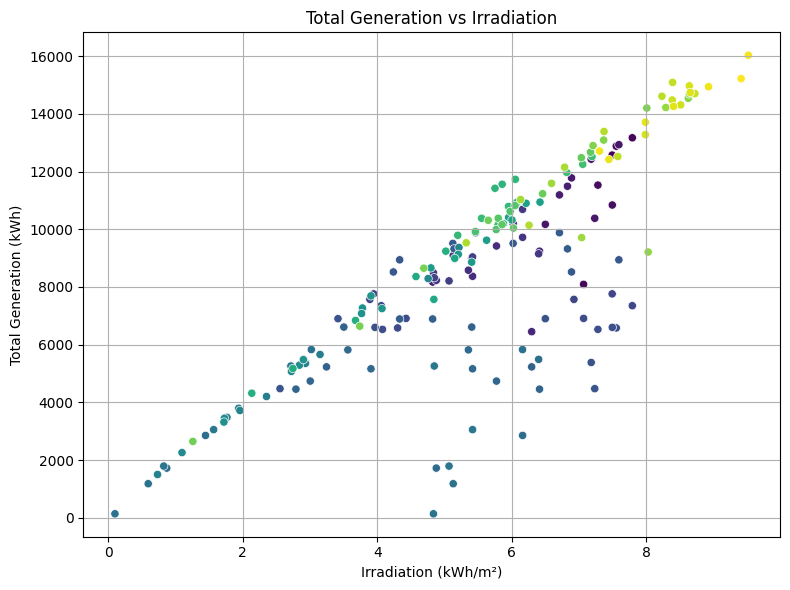

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Irradiation', y='Total Generation', hue='Date', palette='viridis', legend=False)
plt.title('Total Generation vs Irradiation')
plt.xlabel('Irradiation (kWh/m²)')
plt.ylabel('Total Generation (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


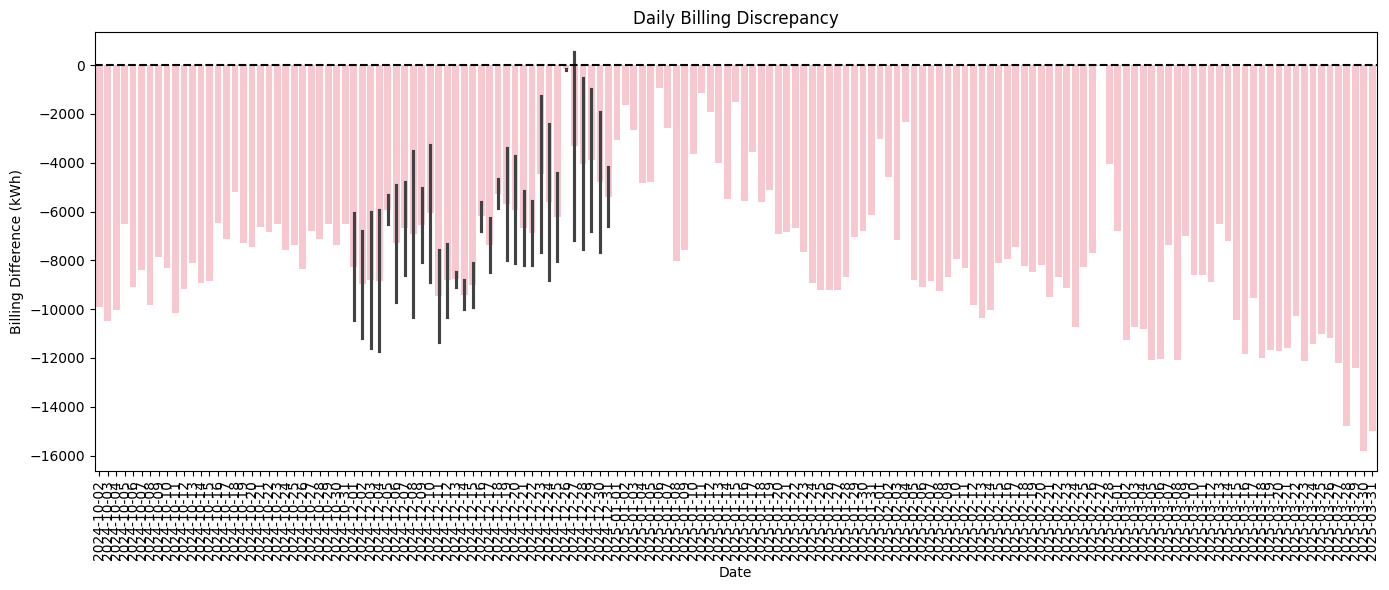

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Date', y='Billing Difference', color='pink')
plt.axhline(0, color='black', linestyle='--')
plt.title('Daily Billing Discrepancy')
plt.xlabel('Date')
plt.ylabel('Billing Difference (kWh)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyError: None